# 用 Matplotlib 绘图
用 Matplotlib 创建柱状图，显示用 groupby 和查询功能做出的结论。

In [1]:
# 导入所需数据包并加载 `winequality_edited.csv`
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('winequality_edited.csv')

### #1: 酒精含量高的酒是否评分较高？
创建柱状图，用一个条柱表示酒精含量低的酒样本，另一个条柱表示酒精含量高的酒样本。第一个条柱已填充了数据。

In [2]:
# 用查询功能选择每个组，并获取其平均质量
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

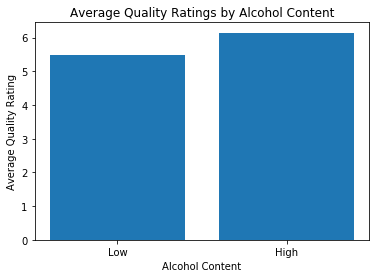

In [3]:
# 用合适的标签创建柱状图
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: 口感较甜的酒是否评分较高？
创建柱状图，用一个条柱表示残留糖分低的酒样本，另一个条柱表示残留糖分高的酒样本。

In [4]:
# 用查询功能选择每个组，并获取其平均质量
median = df['residual_sugar'].median()
low = df.query('residual_sugar < {}'.format(median))
high = df.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()


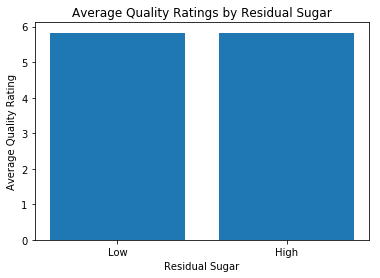

In [5]:
# 用合适的标签创建柱状图
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');


### #3: 哪个酸度水平的平均评分最高？
创建柱状图，四个酸度水平分别用一个条柱表示。

In [39]:
# 使用分组功能获取每个酸度水平的平均质量
grouped_mean_quality = df.groupby('acidity_levels').mean()['quality']
grouped_mean_quality = grouped_mean_quality.reindex(['Low', 'Medium', 'Moderately High', 'High'])

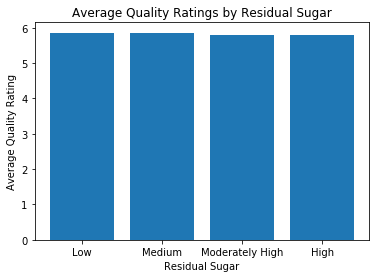

In [40]:
# 用合适的标签创建柱状图
locations = [1, 2, 3, 4]
heights = list(grouped_mean_quality)
labels = list(grouped_mean_quality.index)
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### 附加题：为 #3 中的数据创建线图
可以使用 pyplot 的 [绘图](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) 功能进行创建。

将线图与柱状图相比较。如果用线图代替柱状图，会对数据结论产生什么影响？

([<matplotlib.axis.XTick at 0x7f94ece9e550>,
 <a list of 4 Text xticklabel objects>)

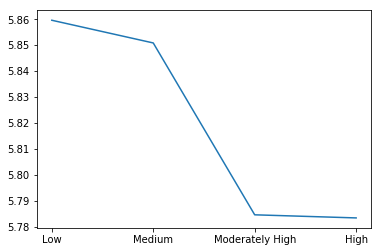

In [41]:
plt.plot(locations, heights)
plt.xticks(locations, labels)